# **SIN 393 – Introduction to Computer Vision (2023)**

# Lecture 05 - Part 1a - Deep Learning

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the required libraries
---

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Activation functions
---

### Sigmoid function

* Sigmoid function:
$$g(\mathbf{v}) = {{1}\over{1 + e^{-\mathbf{v}}}}$$

* Derivative of the Sigmoid function:
$$\frac{d}{d\mathbf{v}}g(\mathbf{v}) = g(\mathbf{v})(1 - g(\mathbf{v}))$$

In [2]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))
    ### return np.array([1 / (1 + math.exp(-v[0])), 1 / (1 + math.exp(-v[1]))])

def sigmoid_grad(v):
    y_ = sigmoid(v) * (1 - sigmoid(v))
    return y_

### ReLu function

* ReLu function:
$$g(\mathbf{v}) = max(0, \mathbf{v})   
\ \ \textit{or} \ \
g(\mathbf{v})  = 
\begin{cases*}
{}\mathbf{v}, & \text{$\mathbf{v} > 0$} \\
{}0, & \text{$\mathbf{v} \leq 0$}
\end{cases*}
$$

* Derivative of the ReLu function:
$$\frac{d}{d\mathbf{v}}g(\mathbf{v})  = 
\begin{cases*}
{}1, & \text{$\mathbf{v} > 0$} \\
{}0, & \text{$\mathbf{v} \leq 0$}
\end{cases*}
$$

In [3]:
def relu(v):
    return np.maximum(0, v)

def relu_grad(v):
    return np.greater(v, 0).astype(float)    

### Plotting the activation functions

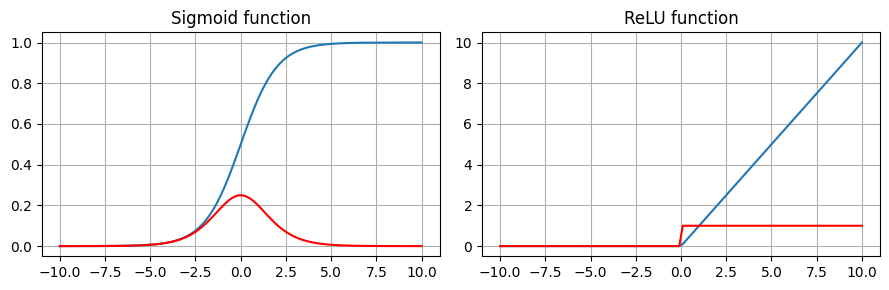

In [4]:
v = np.linspace(-10, 10, 100)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(v, sigmoid(v))
plt.title('Sigmoid function')
plt.plot(v, sigmoid_grad(v), 'r')
plt.grid()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(v, relu(v))
plt.title('ReLU function')
plt.plot(v, relu_grad(v), 'r')
plt.grid()
plt.tight_layout()

plt.show()

In [5]:
def interact_act(v_range, v):
    plt.figure(figsize=(9, 3))

    plt.subplot(1, 2, 1)
    plt.plot(v_range, sigmoid(v_range))
    plt.title('Sigmoid function')
    plt.plot(v_range, sigmoid_grad(v) * (v_range - v) + sigmoid(v), 'r')
    plt.xlim([v_range[0], v_range[-1]])
    plt.ylim([-0.2, 1.2])
    plt.grid()
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.plot(v_range, relu(v_range))
    plt.title('ReLU function')
    plt.plot(v_range, relu_grad(v) * (v_range - v) + relu(v), 'r')
    plt.xlim([v_range[0], v_range[-1]])
    plt.ylim([-2, 10])
    plt.grid()
    plt.tight_layout()
    
    plt.show()

In [6]:
slider_v = widgets.IntSlider(value=0, min=-10, max=9)

v_range = np.linspace(-10, 10, 100)

widgets.interact(interact_act, v_range=widgets.fixed(v_range), v=slider_v)

interactive(children=(IntSlider(value=0, description='v', max=9, min=-10), Output()), _dom_classes=('widget-in…

<function __main__.interact_act(v_range, v)>

## Loss functions
---

* MSE loss function:
$$L(\mathbf{y}, \mathbf{\hat{y}}) = {{1}\over{N}}(\mathbf{y} - \mathbf{\hat{y}})^2,   \textit{   where N is the number of classes}$$

* Partial derivative of the MSE loss function:
$$\frac{\partial{L}}{\partial{\mathbf{y}}} = -\frac{2}{N}(\mathbf{y} - \mathbf{\hat{y}})$$

In [7]:
def loss_mse(y, y_hat):
    return (1/len(y)) * (y - y_hat)**2

def loss_mse_grad(y, y_hat):
    N = len(y)
    return -(2 / N) * (y - y_hat)
    ### return -1 *  (y - y_hat)

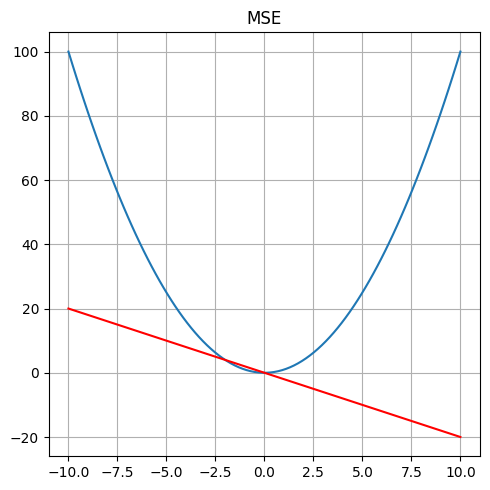

In [8]:
v = np.linspace(-10, 10, 100)

plt.figure(figsize=(5, 5))

plt.plot(v, loss_mse([0], v))
plt.title('MSE')
plt.plot(v, -loss_mse_grad([0], v), 'r')
plt.grid()
plt.tight_layout()

plt.show()

In [9]:
def interact_loss(y_range, y, y_hat):
    
    plt.figure(figsize=(5, 5))

    plt.plot(y_range, loss_mse([y], y_range))
    plt.title('MSE')
    plt.plot(v, -loss_mse_grad(np.array([y]), np.array([y_hat])) * (y_hat - y_range) + loss_mse(np.array([y]), np.array([y_hat])), 'r')
    plt.xlim([y_range[0], y_range[-1]])
    plt.ylim([-20, 100])
    plt.grid()
    plt.tight_layout()

    plt.show()

In [10]:
slider_y = widgets.IntSlider(value=0, min=-10, max=9)
slider_yhat = widgets.IntSlider(value=2, min=-10, max=9)

y_range = np.linspace(-10, 10, 100)

widgets.interact(interact_loss, y_range=widgets.fixed(y_range), y=slider_y, y_hat=slider_yhat)

interactive(children=(IntSlider(value=0, description='y', max=9, min=-10), IntSlider(value=2, description='y_h…

<function __main__.interact_loss(y_range, y, y_hat)>

## Architecture and hyperparameters
---

### Inputs and outputs

In [11]:
x = np.array([0.7])
y = np.array([1.0])

print(f'Number of classes: {len(y)}')

Number of classes: 1


### Weights and bias

In [12]:
W0 = np.array([[0.1]])

b0 = np.array([0.25])

W1 = np.array([[0.5]])

b1 = np.array([0.35])

![title](figures/nn01a_ok.png)

### Hyperparameters

In [13]:
LEARNING_RATE = 0.01

# For float numbers rounding
DEC = 4 # PyTorch and Matlab default is 4

## Forward pass
---

$\mathbf{v}^0 = \mathbf{x}\mathbf{W}^{0} + \mathbf{b}^0$

$\mathbf{y}^0 = \sigma(\mathbf{v}^0)$

$\mathbf{v}^{1} = \mathbf{y}^{0}\mathbf{W}^{1} + \mathbf{b}^{1}$

$\mathbf{\hat{y}} = \sigma(\mathbf{v}^1)$


In [14]:
v0 = np.dot(x, W0) + b0
print(f'v0 = {np.around(v0, DEC)}')

y0 = sigmoid(v0)
print(f'y0 = {np.around(y0, DEC)}')

v1 = np.dot(y0, W1) + b1
print(f'v1 = {np.around(v1, DEC)}')

y_hat = sigmoid(v1)
print(f'y_hat = {np.around(y_hat, DEC)}')

v0 = [0.32]
y0 = [0.5793]
v1 = [0.6397]
y_hat = [0.6547]


In [15]:
L = loss_mse(y, y_hat)
print(f'L = {np.around(L, DEC)}')

L = [0.1192]


## Backpropagation
---

### Layer 1

* We need to find $\frac{\partial{L}}{\partial{\mathbf{W}^1}}$ to update the weights, $\mathbf{W}^1$, through Gradient Descent.
* We can compute $\frac{\partial{L}}{\partial{\mathbf{W}^1}}$ using the chain rule:

$$\frac{\partial{L}}{\partial{\mathbf{W^1}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{W^1}}}$$

* We also need to find $\frac{\partial{L}}{\partial{\mathbf{b^1}}}$ to update the bias, $\mathbf{b}^1$, through Gradient Descent.
* We can compute $\frac{\partial{L}}{\partial{\mathbf{b^1}}}$ using the chain rule:
$$\frac{\partial{L}}{\partial{\mathbf{b^1}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{b^1}}}$$

#### Weights

$$\frac{\partial{L}}{\partial{\mathbf{W^1}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{W^1}}}$$

In [16]:
# ∂L/∂y^ 
# dL_dyhat = loss_mse_grad(y, y_hat, N)
dL_dyhat = loss_mse_grad(y, y_hat)
print(f'∂L/∂y^ = {np.around(dL_dyhat, DEC)}')

# ∂y^/∂v1
dyhat_dv1 = sigmoid_grad(v1)
print(f'\n∂y^/∂v1 = {np.around(dyhat_dv1, DEC)}')

# ∂v1/∂W1
dv1_dW1 = np.hstack([y0[np.newaxis].T] * len(dyhat_dv1))
print(f'\n∂y^/∂W1 = \n{np.around(dv1_dW1, DEC)}')

# ∂L/∂W1 = ∂L/∂y^ * ∂y^/∂v1 * ∂v1/∂W1
# -----------------------------------
dL_dW1 = dL_dyhat * dyhat_dv1 * dv1_dW1
print(f'\n∂L/∂W1 = \n{np.around(dL_dW1, DEC)}')

∂L/∂y^ = [-0.6906]

∂y^/∂v1 = [0.2261]

∂y^/∂W1 = 
[[0.5793]]

∂L/∂W1 = 
[[-0.0905]]


#### Bias

$$\frac{\partial{L}}{\partial{\mathbf{b^1}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{b^1}}}$$

In [17]:
# ∂v1/∂b1
# As the input for bias is fixed in 1, the derivatives are 1.

# ∂L/∂b1 = ∂L/∂y^ * ∂y^/∂v1 * ∂v1/∂b1
# -----------------------------------
dL_db1 = dL_dyhat * dyhat_dv1 
print(f'∂L/∂b1 = {np.around(dL_db1, DEC)}')

∂L/∂b1 = [-0.1561]


### Layer 0

* We need to find $\frac{\partial{L}}{\partial{\mathbf{W}^0}}$ to update the weights, $\mathbf{W}^0$ through Gradient Descent.
* We can compute $\frac{\partial{L}}{\partial{\mathbf{W}^0}}$ using the chain rule:

$$\frac{\partial{L}}{\partial{\mathbf{W}^0}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{y^0}}} \times \frac{\partial{\mathbf{y^0}}}{\partial{\mathbf{v^0}}} \times \frac{\partial{\mathbf{v^0}}}{\partial{\mathbf{W}^0}}$$

* Simplifying to use the already calculated values:

$$\frac{\partial{L}}{\partial{\mathbf{W}^0}} = \frac{\partial{L}}{\partial{\mathbf{y^0}}} \times \frac{\partial{\mathbf{y^0}}}{\partial\mathbf{{v^0}}} \times \frac{\partial{\mathbf{v^0}}}{\partial{\mathbf{W}^0}}$$

* where:
$$\frac{\partial{L}}{\partial{\mathbf{y^0}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{y^0}}}$$

* in which $\frac{\partial{L}}{\partial{\mathbf{\hat{y}}}}$ and $\frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}}$ has already been calculated, and:

$$\frac{\partial{\mathbf{v}^1}}{\partial{\mathbf{y}^0}} = \mathbf{W}^1$$

* We need to find $\frac{\partial{L}}{\partial{\mathbf{b}^0}}$ to update the bias, $\mathbf{b}^0$, through Gradient Descent.
* We can compute $\frac{\partial{L}}{\partial{\mathbf{b}^0}}$ using the chain rule:

$$\frac{\partial{L}}{\partial{\mathbf{b}^0}} = \frac{\partial{L}}{\partial{\mathbf{y^0}}} \times \frac{\partial{\mathbf{y^0}}}{\partial\mathbf{{v^0}}} \times \frac{\partial{\mathbf{v^0}}}{\partial{\mathbf{b}^0}}$$

#### Weights

$$\frac{\partial{\mathbf{v}^1}}{\partial{\mathbf{y}^0}} = \mathbf{W}^1$$

In [18]:
# ∂v1/∂y0
dv1_dy0 = W1
print(f'∂v1/∂y0 = \n{np.around(dv1_dy0, DEC)}')

∂v1/∂y0 = 
[[0.5]]


$$\frac{\partial{L}}{\partial{\mathbf{y^0}}} = \frac{\partial{L}}{\partial{\mathbf{\hat{y}}}} \times \frac{\partial{\mathbf{\hat{y}}}}{\partial{\mathbf{v^1}}} \times \frac{\partial{\mathbf{v^1}}}{\partial{\mathbf{y^0}}}$$

In [19]:
# ∂L/∂y0 = ∂L/∂y^ * ∂y^/∂v1 * ∂v1/∂y0
# -----------------------------------
dL_dy0_ = dL_dyhat * dyhat_dv1 * dv1_dy0
print(f'∂L/∂y0 * = \n{np.around(dL_dy0_, DEC)}')

# Summing the contributions of layer 1
dL_dy0 = dL_dy0_.sum(axis=1)
print(f'\n∂L/∂y01 = {np.around(dL_dy0, DEC)}')

∂L/∂y0 * = 
[[-0.0781]]

∂L/∂y01 = [-0.0781]


$$\frac{\partial{L}}{\partial{\mathbf{W}^0}} = \frac{\partial{L}}{\partial{\mathbf{y^0}}} \times \frac{\partial{\mathbf{y^0}}}{\partial\mathbf{{v^0}}} \times \frac{\partial{\mathbf{v^0}}}{\partial{\mathbf{W}^0}}$$

In [20]:
# ∂y0/∂v0
dy0_dv0 = sigmoid_grad(v0)
print(f'∂y0/∂v0 = {dy0_dv0}')

# ∂v0/∂W0
dv0_dW0 = np.hstack([x[np.newaxis].T] * len(dy0_dv0))
print(f'\n∂v0/∂W0 = \n{np.around(dv0_dW0, DEC)}')

# ∂L/∂W0 = ∂L/∂y0 * ∂y0/∂v0 * ∂v0/∂yW0
# ------------------------------------
dL_dW0 = dL_dy0 * dy0_dv0 * dv0_dW0
print(f'\n∂L/∂W0 = \n{np.around(dL_dW0, DEC)}')

∂y0/∂v0 = [0.24370766]

∂v0/∂W0 = 
[[0.7]]

∂L/∂W0 = 
[[-0.0133]]


#### Bias

$$\frac{\partial{L}}{\partial{\mathbf{b}^0}} = \frac{\partial{L}}{\partial{\mathbf{y^0}}} \times \frac{\partial{\mathbf{y^0}}}{\partial\mathbf{{v^0}}} \times \frac{\partial{\mathbf{v^0}}}{\partial{\mathbf{b}^0}}$$

In [21]:
# * ∂v0/∂b0 = 1
# As the input for bias is fixed in 1, the derivatives are 1.

# ∂L/∂b0 = ∂L/∂y0 * ∂y0/∂v0 
# -----------------------------------
dL_db0 = dL_dy0 * dy0_dv0 
print(f'\n∂L/∂b0 = {np.around(dL_db0, DEC)}')


∂L/∂b0 = [-0.019]


## Gradient descent
---

In [22]:
W1 = W1 - LEARNING_RATE * dL_dW1
b1 = b1 - LEARNING_RATE * dL_db1

W0 = W0 - LEARNING_RATE * dL_dW0
b0 = b0 - LEARNING_RATE * dL_db0

print(f'W0 = \n{np.around(W0, DEC)}')
print(f'\nb0 = \n{np.around(b0, DEC)}')

print(f'\nW1 = \n{np.around(W1, DEC)}')
print(f'\nb1 = \n{np.around(b1, DEC)}')

W0 = 
[[0.1001]]

b0 = 
[0.2502]

W1 = 
[[0.5009]]

b1 = 
[0.3516]


## Bibliography
---
* Rabindra Lamsal. A step by step forward pass and backpropagation example
    * https://theneuralblog.com/forward-pass-backpropagation-example/
* Matt Mazur. A Step by Step Backpropagation Example
    * https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
* Back-Propagation is very simple. Who made it Complicated ?
    * https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c 
* Chapter 7: Artificial neural networks with Math.
    * https://medium.com/deep-math-machine-learning-ai/chapter-7-artificial-neural-networks-with-math-bb711169481b
* The Matrix Calculus You Need For Deep Learning
    * http://explained.ai/matrix-calculus/index.html 
* How backpropagation works, and how you can use Python to build a neural network
    * https://medium.freecodecamp.org/build-a-flexible-neural-network-with-backpropagation-in-python-acffeb7846d0 
* All the Backpropagation derivatives
    * https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60
* Brent Scarff. Understanding Backpropagation. 
    * https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0 